In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
mt, mc, mu, v, mZ, mh, g, mW, sw, GF, Vtb = 172, 1.29, 2.16*(10**(-3)), 246, 91.19, 125.3, 0.65, 80.35, np.sqrt(0.23), 1.166*(10**(-5)), 0.9999
KAZH, KAZh, lHhh = 0, -g/(2*np.sqrt(1-sw**2))*1, 0

def lamda(x, y, z):
    return x**2 + y**2 + z**2 - 2*x*y - 2*y*z - 2*x*z
# A -> ttbar decay
def DecayWidthAtt(rtt, MA, mt, Nc):
    return (Nc* np.sqrt(lamda(MA**2, mt**2, mt**2))) / (8*np.pi*(MA**3)) * ((np.abs(-np.complex(0, rtt)/np.sqrt(2)))**2 * MA**2)
# A -> tcbar+tbarc decay
def DecayWidthAtc(rtc, MA, Nc):
    return Nc*(np.sqrt(lamda(MA**2, mt**2, mc**2)) / (8*np.pi*(MA**3)))*(1/8)*(rtc**2 * (MA**2 - (mt+mc)**2) + (rtc)**2 *(MA**2 - (mt-mc)**2))
# H -> ttbar decay 
def DecayWidthHtt(rtt, MH, mt, Nc):
    return (Nc* np.sqrt(lamda(MH**2, mt**2, mt**2)) / (8*np.pi*MH**3)) * (((1/np.sqrt(2)* rtt)**2 * (MH**2 - (mt+mt)**2)))
# H -> tcbar + tbarc decay
def DecayWidthHtc(rtc, MH, Nc):
    return (Nc*np.sqrt(lamda(MH**2, mt**2, mc**2))/(8*np.pi*MH**3))*(1/8)*(rtc**2 * (MH**2 - (mt+mc)**2) + rtc**2 * (MH**2- (mt-mc)**2))
# A -> tubar+tbaru decay
def DecayWidthAtu(rtu, MA, Nc):
    return Nc*(np.sqrt(lamda(MA**2, mt**2, mu**2)) / (8*np.pi*(MA**3)))*(1/8)*(rtu**2 * (MA**2 - (mt+mu)**2) + (rtu)**2 *(MA**2 - (mt-mu)**2))
# A -> HZ 
def DecayWidthAZH(KAZH, MA, MH):
    return (MA**3) * (KAZH**2) * (lamda(1, ((MH**2/MA**2)), (mZ**2/MA**2)))**(3/2) / (16*np.pi*mZ**2)
def DecayWidthAZh(KAZh, MA, MH):
    return (MA**3) * (KAZh**2) * (lamda(1, ((mh**2/MA**2)), (mZ**2/MA**2)))**(3/2) / (16*np.pi*mZ**2)
# total decay width for A
def DecayWidthAtot(rtt, rtu, rtc, KAZH, KAZh, MA, MH):
    rtotA = 0
    if MA > mt+mc:
        rtotA += 2*DecayWidthAtc(rtc, MA, 3)
    if MA > mt+mu:
        rtotA += 2*DecayWidthAtu(rtu, MA, 3)
    if MA > 2*mt:
        rtotA += DecayWidthAtt(rtt, MA, mt, 3)
    if MH > 0 and MA > MH + mZ:
        rtotA += DecayWidthAZH(KAZH, MA, MH)
    if MH > 0 and MA > mh + mZ:
        rtotA += DecayWidthAZh(KAZh, MA, MH)
    return rtotA
# H -> tubar+tbaru decay
def DecayWidthHtu(rtu, MH, Nc):
    return Nc*(np.sqrt(lamda(MH**2, mt**2, mu**2)) / (8*np.pi*(MH**3)))*(1/8)*(rtu**2 * (MH**2 - (mt+mu)**2) + (rtu)**2 *(MH**2 - (mt-mu)**2))
# H -> AZ
def DecayWidthHZA(KHAZ, MH, MA):
    return (MH)**3 * (KHAZ)**2 * (lamda(1, ((MA**2)/(MH**2)), ((mZ**2)/(MH**2))))**(3/2) / (16*np.pi*mZ**2)
# H -> hh
def DecayWidthHhh(LHhh, MH):
    return (2*LHhh)**2 * (lamda(1, ((mh**2)/(MH**2)), ((mh**2)/(MH**2))))**(1/2) / (32*np.pi*MH)
# total decay width for H
def DecayWidthHtot(rtt, rtu, rtc, KHAZ, LHhh, MA, MH):
    rtotH = 0
    if MH > mt+mc:
        rtotH += 2*DecayWidthHtc(rtc, MH, 3)
    if MH > mt+mu:
        rtotH += 2*DecayWidthHtu(rtu, MH, 3)
    if MH > 2*mt:
        rtotH += DecayWidthHtt(rtt, MH, mt, 3)
    if MH > 0 and MH > MA + mZ:
        rtotH += DecayWidthHZA(KHAZ, MH, MA)
    if MH > 2*mh:
        rtotH += DecayWidthHhh(LHhh, MH)
    return rtotH

In [27]:
ma = np.arange(350, 700+5, 5)
TotalWidthH_01 = [DecayWidthHtot(1, 0, 0.1, KAZH, KAZh, element, element) for element in ma]
TotalWidthH_05 = [DecayWidthHtot(1, 0, 0.5, KAZH, KAZh, element, element) for element in ma]
TotalWidthH_10 = [DecayWidthHtot(1, 0, 1, KAZH, KAZh, element, element) for element in ma]

TotalWidthA_01 = [DecayWidthAtot(1, 0, 0.1, KAZH, lHhh, element, element) for element in ma]
TotalWidthA_05 = [DecayWidthAtot(1, 0, 0.5, KAZH, lHhh, element, element) for element in ma]
TotalWidthA_10 = [DecayWidthAtot(1, 0, 1, KAZH, lHhh, element, element) for element in ma]

PartialWidthAtt = [DecayWidthAtt(1, element, mt, 3) for element in ma]
PartialWidthAtc_10 = [DecayWidthAtc(1, element, 3)*2 for element in ma]
PartialWidthAtc_05 = [DecayWidthAtc(0.5, element, 3)*2 for element in ma]
PartialWidthAtc_01 = [DecayWidthAtc(0.1, element, 3)*2 for element in ma]
PartialWidthHtt = [DecayWidthHtt(1, element, mt, 3) for element in ma]
PartialWidthHtc_10 = [DecayWidthHtc(1, element, 3)*2 for element in ma]
PartialWidthHtc_05 = [DecayWidthHtc(0.5, element, 3)*2 for element in ma]
PartialWidthHtc_01 = [DecayWidthHtc(0.1, element, 3)*2 for element in ma]

br_att_01 = [b / m for b,m in zip(PartialWidthAtt, TotalWidthA_01)]
br_att_05 = [b / m for b,m in zip(PartialWidthAtt, TotalWidthA_05)]
br_att_10 = [b / m for b,m in zip(PartialWidthAtt, TotalWidthA_10)]
br_atc_01 = [b / m for b,m in zip(PartialWidthAtc_01, TotalWidthA_01)]
br_atc_05 = [b / m for b,m in zip(PartialWidthAtc_05, TotalWidthA_05)]
br_atc_10 = [b / m for b,m in zip(PartialWidthAtc_10, TotalWidthA_10)]
br_htt_01 = [b / m for b,m in zip(PartialWidthHtt, TotalWidthH_01)]
br_htt_05 = [b / m for b,m in zip(PartialWidthHtt, TotalWidthH_05)]
br_htt_10 = [b / m for b,m in zip(PartialWidthHtt, TotalWidthH_10)]
br_htc_01 = [b / m for b,m in zip(PartialWidthHtc_01, TotalWidthH_01)]
br_htc_05 = [b / m for b,m in zip(PartialWidthHtc_05, TotalWidthH_05)]
br_htc_10 = [b / m for b,m in zip(PartialWidthHtc_10, TotalWidthH_10)]

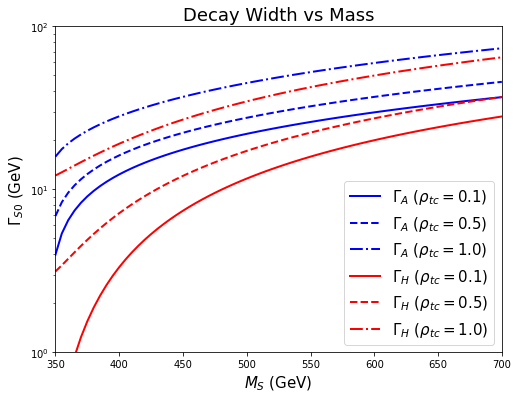

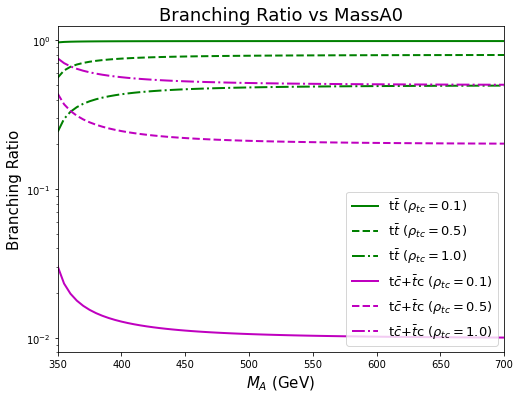

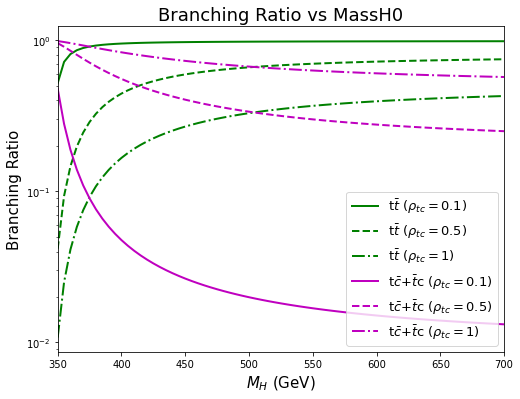

In [28]:
plt.figure(figsize=(8, 6))
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(ma, TotalWidthA_01, 'b-', label=r'$\Gamma_{A}$ ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, TotalWidthA_05, 'b--', label=r'$\Gamma_{A}$ ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, TotalWidthA_10, 'b-.', label=r'$\Gamma_{A}$ ($\rho_{tc}=1.0$)', linewidth=2)
plt.plot(ma, TotalWidthH_01, 'r-', label=r'$\Gamma_{H}$ ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, TotalWidthH_05, 'r--', label=r'$\Gamma_{H}$ ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, TotalWidthH_10, 'r-.', label=r'$\Gamma_{H}$ ($\rho_{tc}=1.0$)', linewidth=2)
plt.title('Decay Width vs Mass', fontsize=18)
plt.xlabel(r'$M_{S}$ (GeV)', fontsize=15)
plt.ylabel(r'$\Gamma_{S0}$ (GeV)', fontsize=15)
plt.ylim(1, 100)
plt.legend(loc='lower right', prop={'size': 15})
plt.show()
#plt.savefig('DWvsMS0')
plt.figure(figsize=(8, 6))
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(ma, br_att_01, 'g-', label=r't$\bar{t}$ ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, br_att_05, 'g--', label=r't$\bar{t}$ ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, br_att_10, 'g-.', label=r't$\bar{t}$ ($\rho_{tc}=1.0$)', linewidth=2)
plt.plot(ma, br_atc_01, 'm-', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, br_atc_05, 'm--', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, br_atc_10, 'm-.', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=1.0$)', linewidth=2)
plt.title('Branching Ratio vs MassA0', fontsize=18)
plt.xlabel(r'$M_{A}$ (GeV)', fontsize=15)
plt.ylabel('Branching Ratio', fontsize=15)
#plt.ylim(0.01, 1)
plt.legend(loc='lower right', prop={'size': 13})
plt.show()
#plt.savefig('BRvsMA0.png')
plt.figure(figsize=(8, 6))
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(ma, br_htt_01, 'g-', label=r't$\bar{t}$ ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, br_htt_05, 'g--', label=r't$\bar{t}$ ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, br_htt_10, 'g-.', label=r't$\bar{t}$ ($\rho_{tc}=1$)', linewidth=2)
plt.plot(ma, br_htc_01, 'm-', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, br_htc_05, 'm--', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, br_htc_10, 'm-.', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=1$)', linewidth=2)
plt.title('Branching Ratio vs MassH0', fontsize=18)
plt.xlabel(r'$M_{H}$ (GeV)', fontsize=15)
plt.ylabel('Branching Ratio', fontsize=15)
#plt.ylim(0.01, 1)
plt.legend(loc='lower right', prop={'size': 13})
plt.show()
#plt.savefig('BRvsMH0.png')

In [29]:
# Cross Section Calculation

In [41]:
# SS2t
ma = [250, 350, 450, 550, 650]
ms = [200, 300, 400, 500, 600]
[DecayWidthAtot(0, 0, 1, KAZH, KAZh, ma[i], ms[i]) for i in range(5)]

[4.761314099785683,
 18.746375850009283,
 39.55869732044769,
 68.89071787498688,
 108.79292258841846]

In [42]:
# 3b3l
maj = [350, 400, 450, 500, 550, 600, 650, 700]
mhj = [350, 400, 450, 500, 550, 600, 650, 700]
print([DecayWidthAtot(1, 0, 0.1, KAZH, lHhh, e, e) for e in maj])
print([DecayWidthHtot(1, 0, 0.1, KAZH, lHhh, e, e) for e in maj])
print([DecayWidthAtot(1, 0, 0.5, KAZH, lHhh, e, e) for e in maj])
print([DecayWidthHtot(1, 0, 0.5, KAZH, lHhh, e, e) for e in maj])
print([DecayWidthAtot(1, 0, 1, KAZH, lHhh, e, e) for e in maj])
print([DecayWidthHtot(1, 0, 1, KAZH, lHhh, e, e) for e in maj])

[3.971468008349843, 12.340978652612053, 17.510512368917247, 21.888296836833756, 25.87979309124852, 29.64147366558511, 33.25137848197779, 36.75421182622855]
[0.2510858221774318, 3.33089582984594, 7.392238252326016, 11.637401523582657, 15.860310959586286, 19.997150297933292, 24.032130929749222, 27.967073707803756]
[6.855625748337671, 16.147522363994245, 22.210380489212064, 27.45542761782032, 32.29228303543986, 36.88126855526046, 41.30364319805809, 45.606713037781525]
[3.1352435621652597, 7.137439541228131, 12.092106372620833, 17.204532304569224, 22.272800903777625, 27.23694518760864, 32.084395645829524, 36.81957491935673]
[15.868618685799632, 28.042971462063594, 36.89746836513336, 44.852711308403336, 52.331314111037784, 59.50562758549593, 66.46697043580905, 73.27077932388458]
[12.14823649962722, 19.032888639297482, 26.779194248542137, 34.601815995152236, 42.311831979375555, 49.86130421784411, 57.24772288358048, 64.48364120545979]
